<a href="https://colab.research.google.com/github/nuramrina46/Pemrograman_Python/blob/main/Python_Tugas%2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [3]:
def P_rec(p_trans,lp,gain_trans,gain_rec) :
  p_trans=10*np.log10(p_trans) #convert2dbm
  prx=p_trans-lp+gain_trans+gain_rec #dbm
  prx=10**(prx/10) #numerik
  return prx

In [4]:
def snr(prx,bw) :
  noise=-174+10*np.log10(bw) #dbm
  noise=10**(noise/10) #numerik
  snr=prx/noise #numerik

  return snr 

In [5]:
def capacity(snr,bw) :
  capa=bw*np.log2(1+snr)

  return capa #bps

In [6]:
f=1800 #MHz
lc_1='urban'
lc_2='suburban'
lc_3='open'
tower=80 #m (tinggi tower)
user=1.5 #m (tinggi user)
dmin=300 #m (jarak minimum)
dmax=1000 #m (jarak max)
N=200 #titik (jumlah user)
d=np.random.randint(dmin,dmax,N)

p_trans=30000 #miliwatt (daya transmitter)
gain_trans=10 #db (gain transmitter)
gain_rec=2 #db (gain receiver)
sistem_band=5000000 #Hz (bandwidth sistem)

In [7]:
LpUrban=cos(f,lc_1,tower,user,d)
LpSuburban=cos(f,lc_2,tower,user,d)
LpOpen=cos(f,lc_3,tower,user,d)

#daya yang diterima
P_urban=P_rec(p_trans,LpUrban,gain_trans,gain_rec)
P_suburban=P_rec(p_trans,LpSuburban,gain_trans,gain_rec)
P_Open=P_rec(p_trans,LpOpen,gain_trans,gain_rec)

#SNR
snr_urban=snr(P_urban,sistem_band)
snr_suburban=snr(P_suburban,sistem_band)
snr_open=snr(P_Open,sistem_band)

#capacity
cap_urban=capacity(snr_urban,sistem_band)
cap_suburban=capacity(snr_suburban,sistem_band)
cap_open=capacity(snr_open,sistem_band)

In [8]:
d_sort=d[np.argsort(d)]
#sort daya terima
Urban_sort=P_urban[np.argsort(d)]
Suburban_sort=P_suburban[np.argsort(d)]
Open_sort=P_Open[np.argsort(d)]

#sort snr
snr_urban_sort=snr_urban[np.argsort(d)]
snr_suburban_sort=snr_suburban[np.argsort(d)]
snr_open_sort=snr_open[np.argsort(d)]

#sort capacity
cap_urban_sort=cap_urban[np.argsort(d)]
cap_suburban_sort=cap_suburban[np.argsort(d)]
cap_open_sort=cap_open[np.argsort(d)]

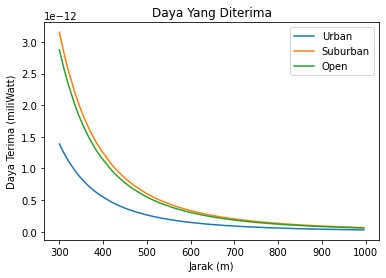

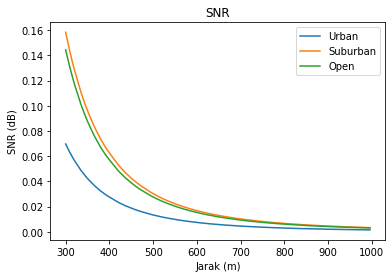

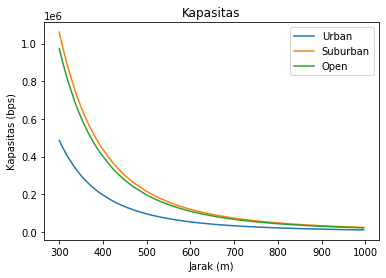

In [9]:
#plot daya terima
plt.figure()
plt.plot(d_sort,Urban_sort,label='Urban')
plt.plot(d_sort,Suburban_sort,label='Suburban')
plt.plot(d_sort,Open_sort,label='Open')
plt.legend()
plt.title('Daya Yang Diterima')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (miliWatt)')
plt.show()

#plot SNR
plt.figure()
plt.plot(d_sort,snr_urban_sort,label='Urban')
plt.plot(d_sort,snr_suburban_sort,label='Suburban')
plt.plot(d_sort,snr_open_sort,label='Open')
plt.legend()
plt.title('SNR')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

#plot capacity
plt.figure()
plt.plot(d_sort,cap_urban_sort,label='Urban')
plt.plot(d_sort,cap_suburban_sort,label='Suburban')
plt.plot(d_sort,cap_open_sort,label='Open')
plt.legend()
plt.title('Kapasitas')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()

In [10]:
f_1=700 #MHz
f_2=900 #MHz
f_3=1800 #MHz
lc='urban'
tower=80 #m (tinggi tower)
user=1.5 #m (tinggi user)
dmin=300 #m (jarak min)
dmax=1000 #m (jarak max)
N=200 #titik (jumlah user)
d=np.random.randint(dmin,dmax,N)

p_trans=30000 #miliwatt (daya transmitter)
gain_trans=10 #db (gain transmitter)
gain_rec=2 #db (gain receiver)
sistem_band=5000000 #Hz (bandwidth sistem)

In [11]:
#cari pathloss
Lpf1=cos(f_1,lc,tower,user,d)
Lpf2=cos(f_2,lc,tower,user,d)
Lpf3=cos(f_3,lc,tower,user,d)

#daya yang diterima
Pf1=P_rec(p_trans,Lpf1,gain_trans,gain_rec)
Pf2=P_rec(p_trans,Lpf2,gain_trans,gain_rec)
Pf3=P_rec(p_trans,Lpf3,gain_trans,gain_rec)

#SNR
snr_f1=snr(Pf1,sistem_band)
snr_f2=snr(Pf2,sistem_band)
snr_f3=snr(Pf3,sistem_band)

#capacity
cap_f1=capacity(snr_f1,sistem_band)
cap_f2=capacity(snr_f2,sistem_band)
cap_f3=capacity(snr_f3,sistem_band)

In [12]:
d_sort=d[np.argsort(d)]
#sort daya terima
f1_sort=Pf1[np.argsort(d)]
f2_sort=Pf2[np.argsort(d)]
f3_sort=Pf3[np.argsort(d)]

#sort SNR
snr_f1_sort=snr_f1[np.argsort(d)]
snr_f2_sort=snr_f2[np.argsort(d)]
snr_f3_sort=snr_f3[np.argsort(d)]

#sort capacity
cap_f1_sort=cap_f1[np.argsort(d)]
cap_f2_sort=cap_f2[np.argsort(d)]
cap_f3_sort=cap_f3[np.argsort(d)]

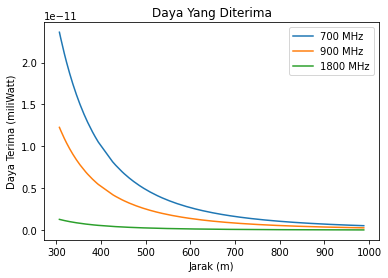

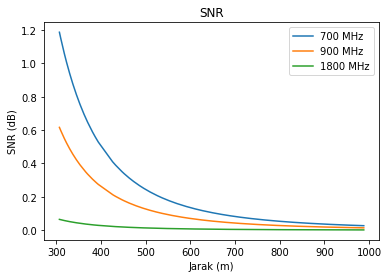

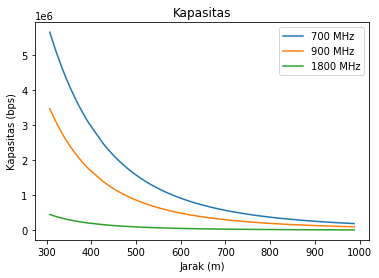

In [13]:
#plot daya terima
plt.figure()
plt.plot(d_sort,f1_sort,label='700 MHz')
plt.plot(d_sort,f2_sort,label='900 MHz')
plt.plot(d_sort,f3_sort,label='1800 MHz')
plt.legend()
plt.title('Daya Yang Diterima')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (miliWatt)')
plt.show()

#plot SNR
plt.figure()
plt.plot(d_sort,snr_f1_sort,label='700 MHz')
plt.plot(d_sort,snr_f2_sort,label='900 MHz')
plt.plot(d_sort,snr_f3_sort,label='1800 MHz')
plt.legend()
plt.title('SNR')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

#plot capacity
plt.figure()
plt.plot(d_sort,cap_f1_sort,label='700 MHz')
plt.plot(d_sort,cap_f2_sort,label='900 MHz')
plt.plot(d_sort,cap_f3_sort,label='1800 MHz')
plt.legend()
plt.title('Kapasitas')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.show()